In [1]:
import numpy as np
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

from shutil import copyfile
from os import getcwd

In [1]:
filenames = os.listdir("train")
len(filenames)

2023

In [2]:
base_dir = ''
source_dir = 'train'

logo1_dir = os.path.join(base_dir, 'logo1')
logo2_dir = os.path.join(base_dir, 'logo2')

train_dir = os.path.join(base_dir, 'train1')
validation_dir = os.path.join(base_dir, 'validation1')

train_logo1_dir = os.path.join(train_dir, 'logo1')
train_logo2_dir = os.path.join(train_dir, 'logo2')

validation_logo1_dir = os.path.join(validation_dir, 'logo1')
validation_logo2_dir = os.path.join(validation_dir, 'logo2')

In [4]:
test_dir ='test'
print("Total images in logo1 directory" , len(os.listdir(logo1_dir)))
print("Total images in logo2 directory" , len(os.listdir(logo2_dir)))
print("Total images in train/logo1 directory" , len(os.listdir(train_logo1_dir)))
print("Total images in train/logo2 directory" , len(os.listdir(train_logo2_dir)))
print("Total images in validation/logo1 directory" , len(os.listdir(validation_logo1_dir)))
print("Total images in validation/logo2 directory" , len(os.listdir(validation_logo2_dir)))
print("Total images in test directory" , len(os.listdir(test_dir)))

Total images in logo1 directory 1011
Total images in logo2 directory 1012
Total images in train/logo1 directory 1011
Total images in train/logo2 directory 1012
Total images in validation/logo1 directory 414
Total images in validation/logo2 directory 411
Total images in test directory 504


In [7]:
model = tf.keras.models.Sequential([    
       tf.keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=(150, 150, 3)),
       tf.keras.layers.Activation('relu'),
       tf.keras.layers.BatchNormalization(axis=-1),
       tf.keras.layers.Conv2D(32, (3, 3), padding="same"),
       tf.keras.layers.Activation("relu"),
       tf.keras.layers.BatchNormalization(axis=-1),
       tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
       tf.keras.layers.Dropout(0.25),
       
       tf.keras.layers.Conv2D(64, (3, 3), padding="same"),
       tf.keras.layers.Activation("relu"),
       tf.keras.layers.BatchNormalization(axis=-1),
       tf.keras.layers.Conv2D(64, (3, 3), padding="same"),
       tf.keras.layers.Activation("relu"),
       tf.keras.layers.BatchNormalization(axis=-1),
       tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
       tf.keras.layers.Dropout(0.25),
       
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(512),
       tf.keras.layers.Activation("relu"),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150),  
        batch_size=30,
        class_mode='binary')


validation_datagen = ImageDataGenerator(rescale=1/255)


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,  
        target_size=(150, 150),  
        batch_size=30,
        class_mode='binary')

Found 2023 images belonging to 2 classes.
Found 938 images belonging to 2 classes.


In [11]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)

C:\Users\TechCare\AppData\Local\Temp/ipykernel_9160/3438167684.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
68/68 [==============================] - 216s 3s/step - loss: 0.3369 - accuracy: 0.8922 - val_loss: 2.3700 - val_accuracy: 0.5043
Epoch 2/10
68/68 [==============================] - 209s 3s/step - loss: 0.1206 - accuracy: 0.9575 - val_loss: 0.5963 - val_accuracy: 0.6482
Epoch 3/10
68/68 [==============================] - 218s 3s/step - loss: 0.0647 - accuracy: 0.9763 - val_loss: 1.0058 - val_accuracy: 0.5533
Epoch 4/10
68/68 [==============================] - 210s 3s/step - loss: 0.0712 - accuracy: 0.9783 - val_loss: 0.7084 - val_accuracy: 0.7143
Epoch 5/10
68/68 [==============================] - 217s 3s/step - loss: 0.0610 - accuracy: 0.9817 - val_loss: 0.7305 - val_accuracy: 0.8070
Epoch 6/10
68/68 [==============================] - 209s 3s/step - loss: 0.0599 - accuracy: 0.9763 - val_loss: 0.5014 - val_accuracy: 0.8827
Epoch 7/10
68/68 [==============================] - 184s 3s/step - loss: 0.0474 - accuracy: 0.9847 - val_loss: 0.5812 - val_accuracy: 0.8913
Epoch 8/10
68

In [12]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Training and validation loss')

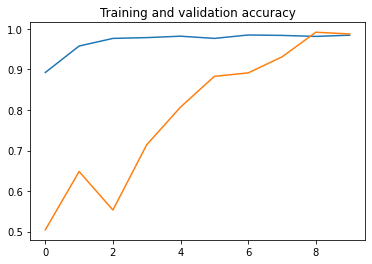

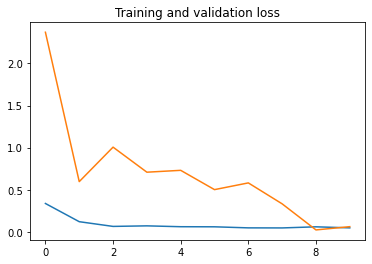

In [13]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [13]:
model.save("train_data.h5")

In [14]:
import pandas as pd

In [18]:
test_files = os.listdir("test")
test_df = pd.DataFrame({'data_test' : test_files})    
samples = test_df.shape[0]


In [19]:
len(test_files)

504

In [20]:
test_data = ImageDataGenerator(rescale=1./255)
test_generator = test_data.flow_from_dataframe(
    test_df, 
    "test", 
    x_col='data_test',
    y_col=None,
    class_mode=None,
    target_size=[150,150],
    batch_size=30,
    shuffle=False)

Found 504 validated image filenames.


In [21]:
predict = model.predict(test_generator)

In [22]:
print(predict)

[[8.16704512e-01]
 [9.81679440e-01]
 [3.10137002e-05]
 [3.32252768e-07]
 [1.64267306e-07]
 [2.30931292e-08]
 [3.31424097e-08]
 [5.56737185e-04]
 [1.57763571e-01]
 [9.44679439e-01]
 [9.99999762e-01]
 [9.91425633e-01]
 [8.47196341e-01]
 [9.72811322e-05]
 [9.62122440e-01]
 [7.53806591e-01]
 [9.32996690e-01]
 [6.78037524e-01]
 [9.00782585e-01]
 [9.32977036e-06]
 [2.82770458e-07]
 [3.00385011e-07]
 [2.00631135e-07]
 [5.25935211e-05]
 [4.46638523e-07]
 [7.03760087e-02]
 [2.29190290e-02]
 [3.04443240e-02]
 [1.97347075e-01]
 [9.99650717e-01]
 [9.97697294e-01]
 [9.93672729e-01]
 [9.89341736e-01]
 [9.99498427e-01]
 [1.02090836e-03]
 [3.05382491e-06]
 [3.32266092e-04]
 [5.11344551e-05]
 [1.35814043e-05]
 [6.08546588e-06]
 [2.26002667e-05]
 [1.74522400e-04]
 [2.17607905e-08]
 [4.08100141e-06]
 [9.30205886e-08]
 [1.30512535e-06]
 [1.04316712e-07]
 [8.52399396e-08]
 [1.65072606e-07]
 [5.26237454e-06]
 [8.00019698e-05]
 [8.91178846e-04]
 [1.97100639e-03]
 [2.83968166e-05]
 [7.95113010e-05]
 [3.602509

In [23]:
for i in range(0,len(predict)):
    if 1 - predict[i] > predict[i]: test_df['category'] = 0
    else: test_df['category'] = 1
for i in range(0,len(predict)):
    if 1 - predict[i] > predict[i]: test_df['category'][i] = 0
    else: test_df['category'][i] = 1

test_df['category'] = test_df['category'].replace({ 'logo2': 1, 'logo1': 0 })


C:\Users\TechCare\AppData\Local\Temp/ipykernel_9160/2193617560.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else: test_df['category'][i] = 1
C:\Users\TechCare\AppData\Local\Temp/ipykernel_9160/2193617560.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if 1 - predict[i] > predict[i]: test_df['category'][i] = 0


In [24]:
print(test_df['category'])
arr_count = np.bincount(test_df['category'])
print(arr_count)

0      1
1      1
2      0
3      0
4      0
      ..
499    1
500    1
501    1
502    1
503    1
Name: category, Length: 504, dtype: int64
[182 322]
